For this first assignment, take a look at the lecture chapter "Preprocessing". Expand the above Jupyter
notebook and address the following topics:

* Missing Values, Scaling, Outliers
* Data encoding and Signal processing
* Visualisation of the data

Write your considerations for each of these topics regarding the dataset – maybe supported by plots – into
the notebook and preferably create code, that does the actual preprocessing steps

### Missing Values, Scaling, Outliers ###

* temp_c: NaN is replaced by median()
* status: NaN is replaced by most frequent value
* rain_mm: NaN is replaced by interpolate()
* For Scalling will will apply **Standardisation** that avoids outlier effect.
* We can use **Moving Average** for outlier detection

## Data encoding and Signal processing ##

Normally we encode the string values to numerical values. In every csv data file **status** is string. We will encode it into integer. We have four status [low, decreased, normal, increased, max] and will replace the status with [1,2,3,4]. i.e low = 1, decrease=2, normal = 3 , increased = 4 and max = 5

## Visualisation of the data ##
For visualisation we used **matplotlib**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


col_time= "time"
col_temp_c = "temp_c"
col_status = "status"
col_rain_mm = "rain_mm"
col_level_cm = "level_cm"
col_flow_m2_s = "flow_m2_s"
rain_max = 50
rain_min = 0
temp_max = 60
temp_min = -50


In [2]:
def fillNaNWithMedian(col):
    median = col.median()
    col.fillna(median, inplace=True)
    
def fillNaNWithMostFrequent(col):
    col.fillna(col.value_counts().index[0], inplace=True)

def fillNaNWithInterpolate(col):
    col.fillna(col.interpolate(),inplace=True)
    
def standardisation(col):
    mean = col.mean()
    standardDev = col.std()
    return (col - mean)/standardDev

# def movingAvg(col):
#     for i in np.arange(len(col)):
#     col[i] = np.mean(col[np.max([0,i-m]):(i+1)])
    
def applyEncoding(col):
    col.replace(['low','decreased','normal','increased','max'],[1,2,3,4,5],inplace=True)

## station_a ##

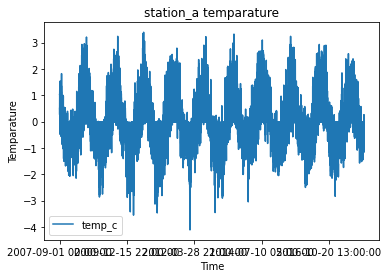

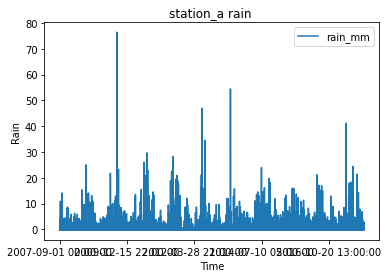

In [3]:
station_a = pd.read_csv('station_a.csv')

# Handling missing values
fillNaNWithMedian(station_a[col_temp_c])
fillNaNWithMostFrequent(station_a[col_status])
fillNaNWithInterpolate(station_a[col_rain_mm])

#Outliers :
# - rain can not be negative
# - for rain max value we used threshold 50
indexNames = station_a[station_a[col_rain_mm] < rain_min].index
station_a.drop(indexNames , inplace=True)
indexNamesMax = station_a[station_a[col_rain_mm] > 50.0 ].index
station_a.drop(indexNamesMax , inplace=True)

# print(station_a[50:100])

# Scaling 
station_a[col_temp_c] = standardisation(station_a[col_temp_c])
station_a[col_rain_mm] = standardisation(station_a[col_rain_mm])


# Apply Encoding 
applyEncoding(station_a[col_status])


# save to file
# station_a.to_csv("station_a_improved.csv")




## station_b ##


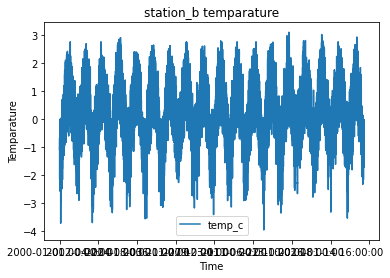

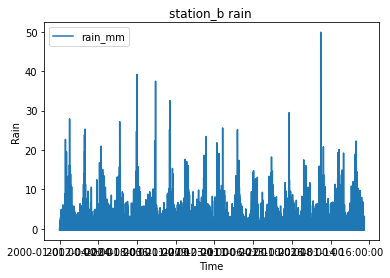

In [4]:
station_b = pd.read_csv('station_b.csv')

# Handling missing values
fillNaNWithMedian(station_b[col_temp_c])
fillNaNWithMostFrequent(station_b[col_status])
fillNaNWithInterpolate(station_b[col_rain_mm])

#Outliers :
# - rain can not be negative
# - for rain max value we used threshold 50
indexNames = station_b[station_b[col_rain_mm] < rain_min].index
station_b.drop(indexNames , inplace=True)
indexNamesMax = station_b[station_b[col_rain_mm] > 50.0 ].index
station_b.drop(indexNamesMax , inplace=True)


## Scaling 
station_b[col_temp_c] = standardisation(station_b[col_temp_c])
station_b[col_rain_mm] = standardisation(station_b[col_rain_mm])


# Apply Encoding 
applyEncoding(station_b[col_status])


# save to file
# station_b.to_csv("station_b_improved.csv")

# Visulization of data
station_b.plot(x =col_time, y=col_temp_c)
plt.title('station_b temparature')
plt.ylabel('Temparature')
plt.xlabel('Time')
plt.show()


station_b.plot(x =col_time, y=col_rain_mm)
plt.title('station_b rain ')
plt.ylabel('Rain')
plt.xlabel('Time')
plt.show()

## station_c ##


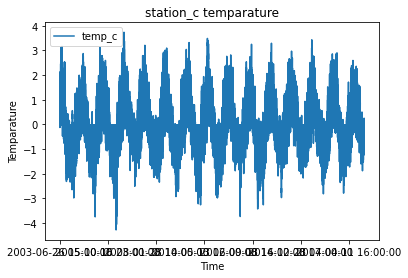

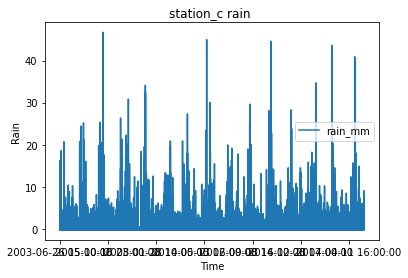

In [5]:
station_c = pd.read_csv('station_c.csv')

# Handling missing values
fillNaNWithMedian(station_c[col_temp_c])
fillNaNWithMostFrequent(station_c[col_status])
fillNaNWithInterpolate(station_c[col_rain_mm])

#Outliers :
# - rain can not be negative
# - for rain max value we used threshold 50
# - temp max =60, min = -60

indexNames = station_c[station_c[col_temp_c] < temp_min].index
station_c.drop(indexNames , inplace=True)
indexNamesMax = station_c[station_c[col_temp_c] > temp_max ].index
station_c.drop(indexNamesMax , inplace=True)

indexNames = station_c[station_c[col_rain_mm] < rain_min].index
station_c.drop(indexNames , inplace=True)
indexNamesMax = station_c[station_c[col_rain_mm] > rain_max ].index
station_c.drop(indexNamesMax , inplace=True)

## Scaling 
station_c[col_temp_c] = standardisation(station_c[col_temp_c])
station_c[col_rain_mm] = standardisation(station_c[col_rain_mm])


# Apply Encoding 
applyEncoding(station_c[col_status])

# save to file
# station_c.to_csv("station_c_improved.csv")

# Visulization of data
station_c.plot(x =col_time, y=col_temp_c)
plt.title('station_c temparature')
plt.ylabel('Temparature')
plt.xlabel('Time')
plt.show()


station_c.plot(x =col_time, y=col_rain_mm)
plt.title('station_c rain ')
plt.ylabel('Rain')
plt.xlabel('Time')
plt.show()

## station_main ##

In [10]:
station_main = pd.read_csv('station_main.csv')

# Handling missing values
fillNaNWithInterpolate(station_main[col_level_cm])
fillNaNWithInterpolate(station_main[col_flow_m2_s])

station_main.describe()


,level_cm,flow_m2_s
count,35063.000000,35063.000000
mean,178.088812,6.241092
std,37.141985,4.929488
min,141.000000,1.690000
25%,155.000000,3.170000
50%,165.000000,4.580000
75%,186.000000,7.410000
max,358.000000,39.000000


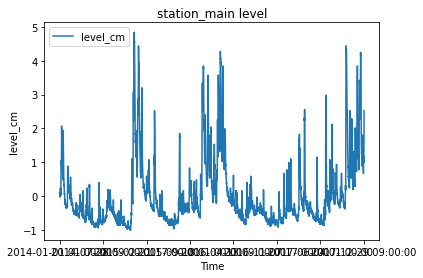

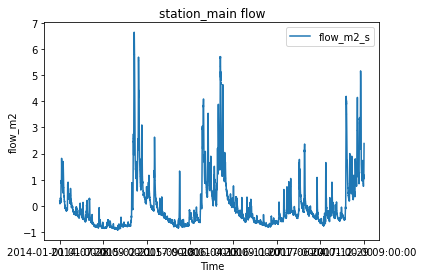

In [13]:
# Visulization of data
station_main.plot(x =col_time, y=col_level_cm)
plt.title('station_main level')
plt.ylabel('level_cm')
plt.xlabel('Time')
plt.show()


station_main.plot(x =col_time, y=col_flow_m2_s)
plt.title('station_main flow')
plt.ylabel('flow_m2')
plt.xlabel('Time')
plt.show()


In [11]:
## Scaling 
station_main[col_level_cm] = standardisation(station_main[col_level_cm])
station_main[col_flow_m2_s] = standardisation(station_main[col_flow_m2_s])

station_main.describe()


,level_cm,flow_m2_s
count,3.506300e+04,35063.000000
mean,1.296944e-16,0.000000
std,1.000000e+00,1.000000
min,-9.985684e-01,-0.923238
25%,-6.216364e-01,-0.623004
50%,-3.523994e-01,-0.336971
75%,2.129985e-01,0.237126
max,4.843877e+00,6.645499


In [ ]:
# save to file
#tation_main.to_csv("station_main_improved2.csv")

In [ ]:
# Visulization of data
station_main.plot(x =col_time, y=col_level_cm)
plt.title('station_main level')
plt.ylabel('level_cm')
plt.xlabel('Time')
plt.show()


station_main.plot(x =col_time, y=col_flow_m2_s)
plt.title('station_main flow')
plt.ylabel('flow_m2')
plt.xlabel('Time')
plt.show()


# # Visulization of data
# station_main.plot(x =col_time, y=col_temp_c)
# plt.title('station_main temperature')
# plt.ylabel(col_temp_c)
# plt.xlabel('Time')
# plt.show()


# station_main.plot(x =col_time, y=col_rain_mm)
# plt.title('station_main rain')
# plt.ylabel(col_rain_mm)
# plt.xlabel('Time')
# plt.show()